In [1]:
import numpy as np
import math as m
from sympy import *
#from sympy.abc import x
import pylab as py
from JSAnimation import IPython_display
import matplotlib.animation as animation
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print 'Enter number of segments'
n = int(raw_input()) #кол-во отрезков
print 'Enter ends of segment'
a , b = raw_input().split() #отрезок
a = float(a)
b = float(b)

Enter number of segments
100
Enter ends of segment
-1 1


In [3]:
print 'Enter speed'
c = int(raw_input()) #скорость переноса
h = (b - a) / n
# tau = h / c *(X), такое что c*tau/h < 1

Enter speed
1


In [4]:
# print 'Enter X for tau'
X = float(raw_input())
tau = h * X / m.fabs(c)
if m.fabs(c) * tau / h > 1:
    print 'wrong input'
print 'kurant = ', m.fabs(c) * tau / h, ', tau = ', tau, ', h = ', h

0.5
kurant =  0.5 , tau =  0.01 , h =  0.02


In [5]:
def f(x):
    if (a + 0.4*(b-a) <= x <= a + 0.6*(b-a)):
        return 1
    else:
        return 0


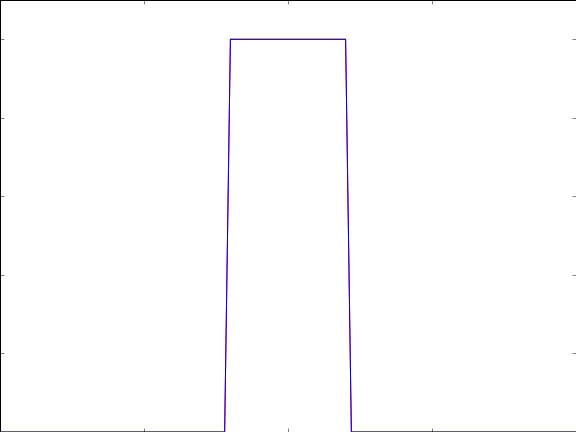
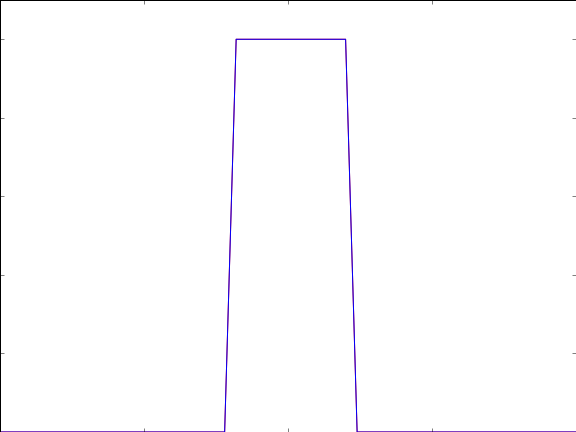
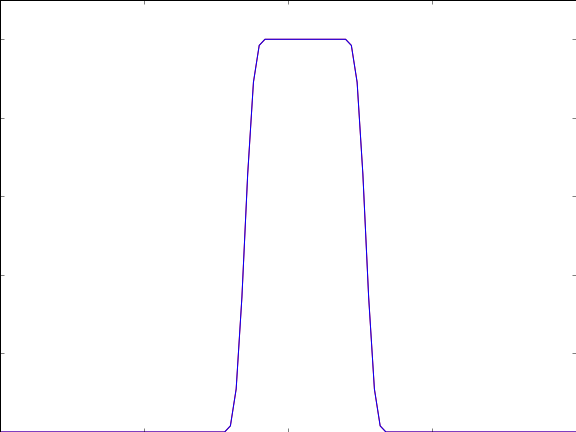
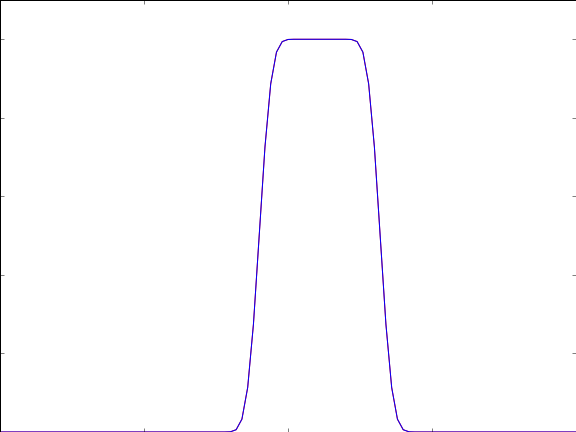
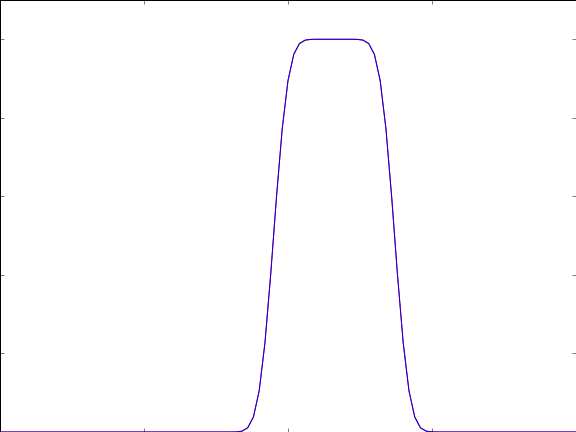
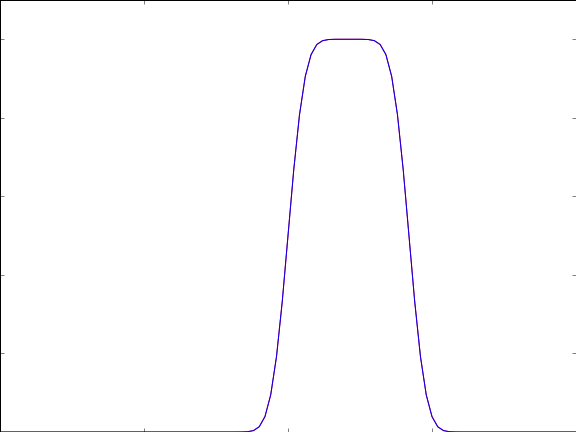
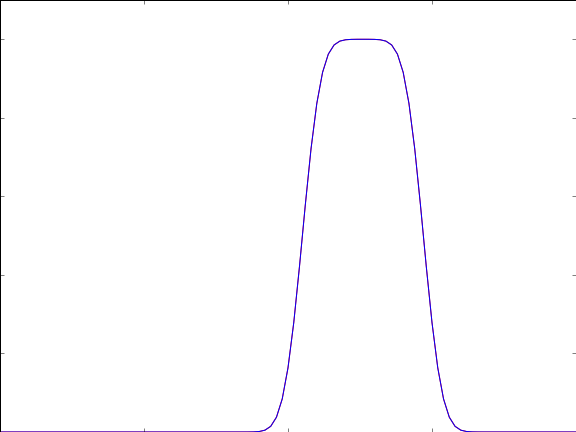
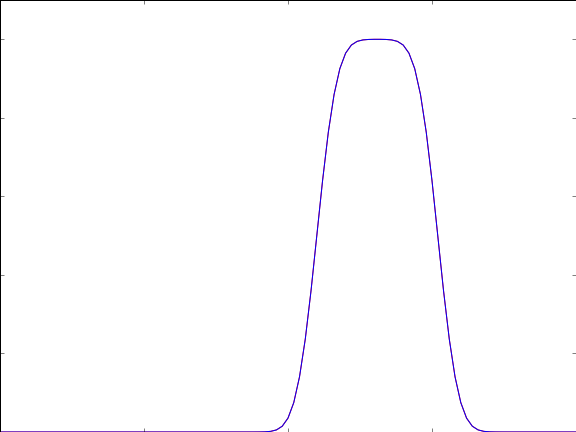
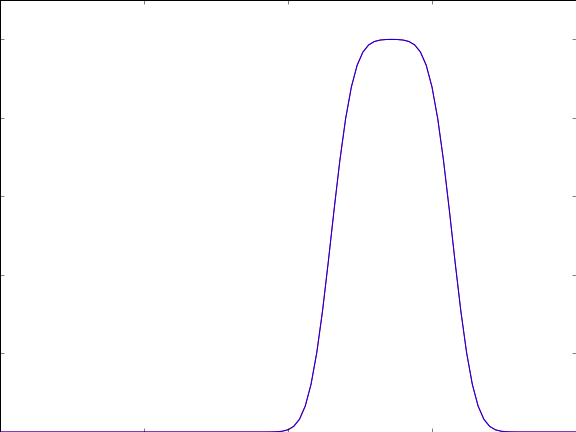
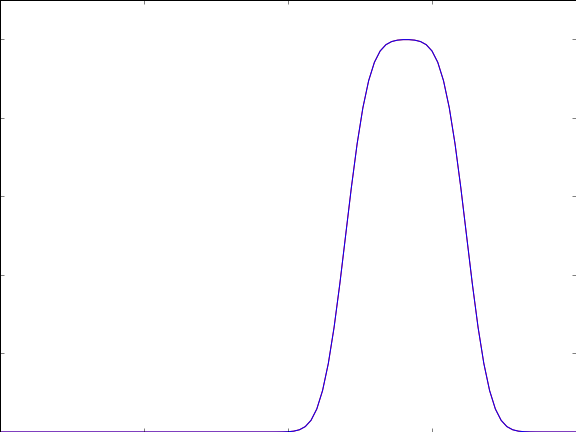
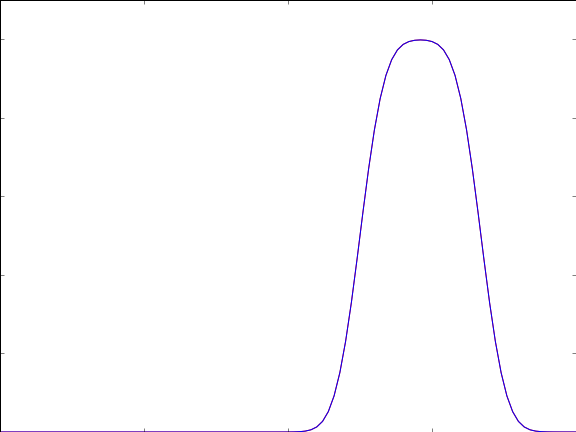
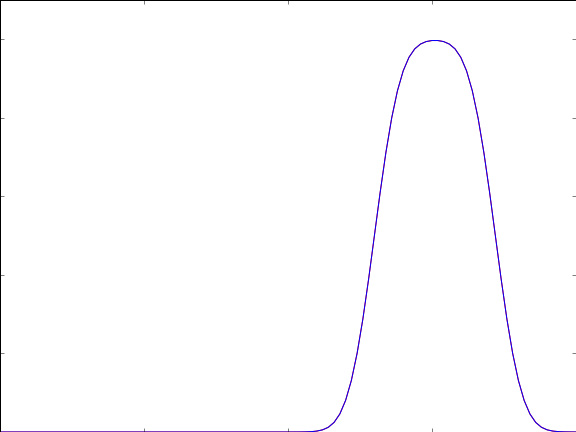
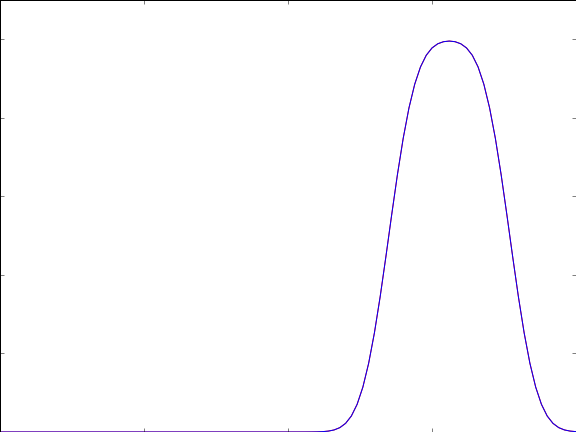
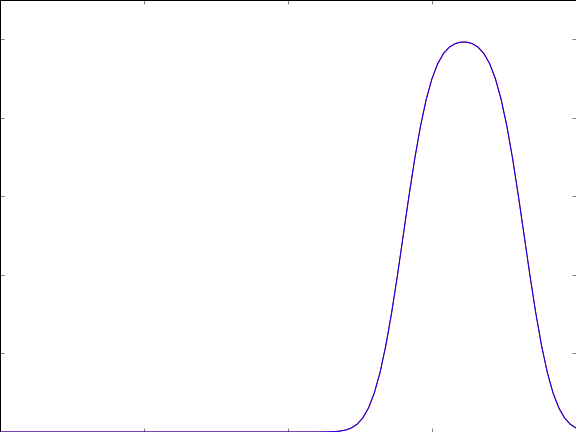
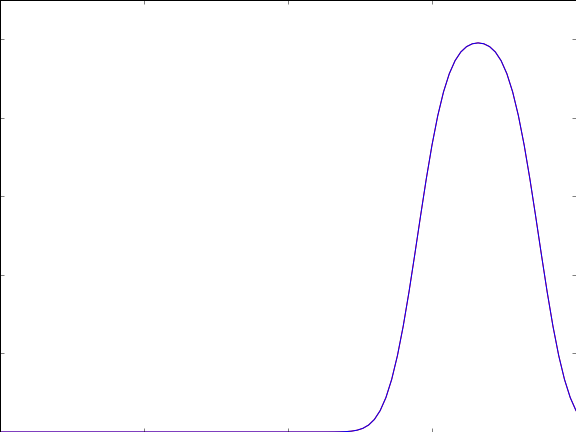
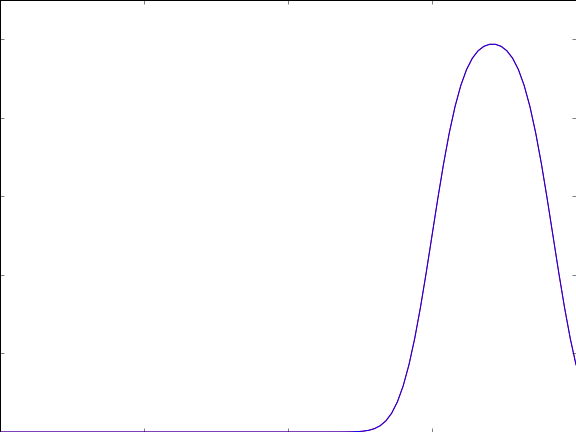
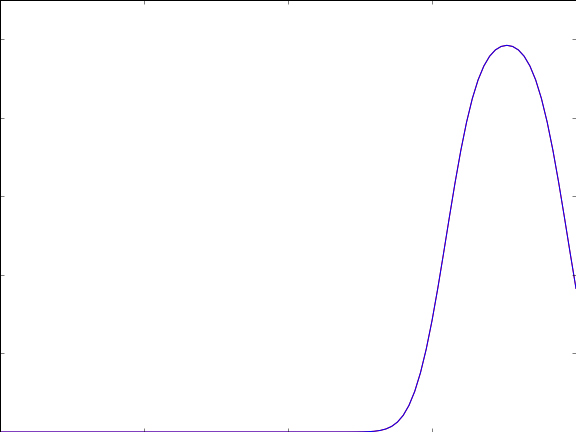
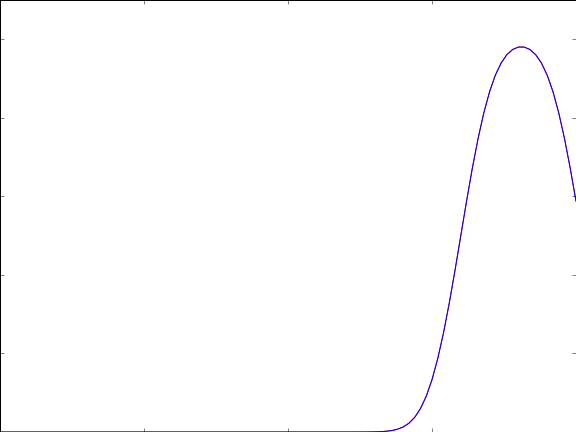
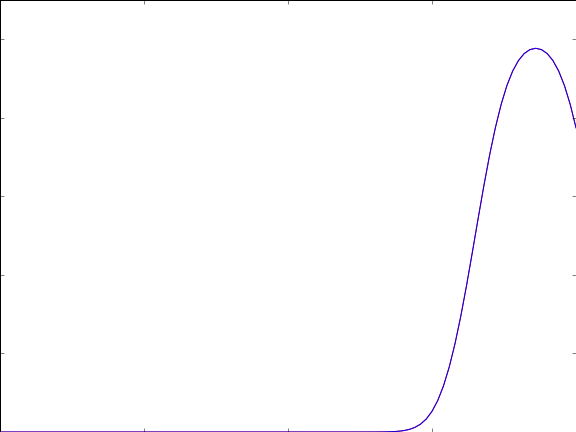
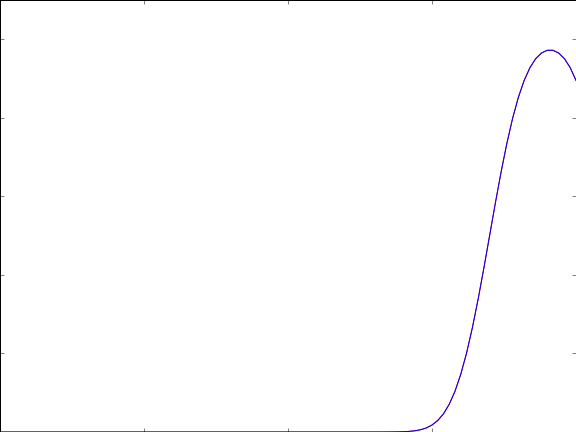
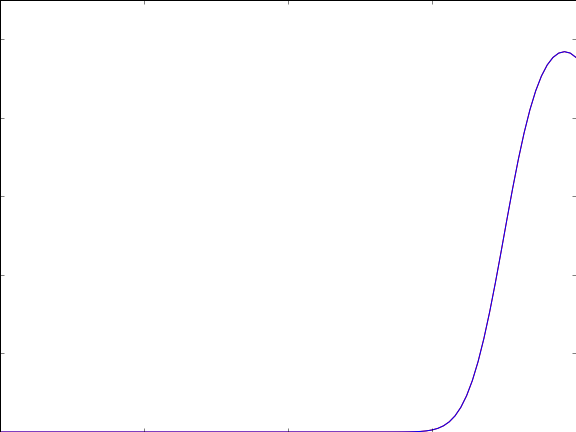
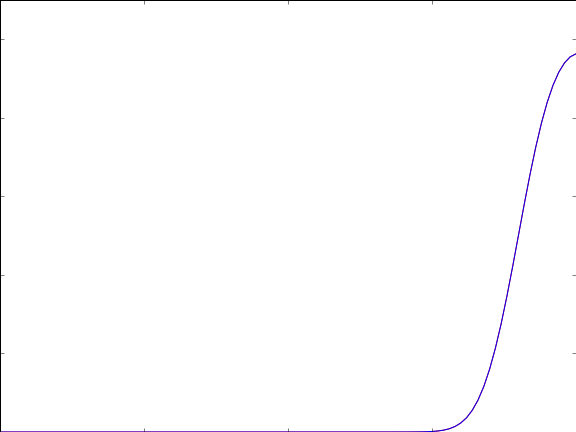

In [6]:
x = np.linspace(a, b, n+1) #сетка
result1 = []
result2 = []
u1 = np.zeros(n+1) # решение
u2 = np.zeros(n+1)
for i in range(n+1):
    u1[i] = f(x[i])
    u2[i] = f(x[i])
t = 0
numT = int(1.0 / tau + 1)
result1.append(list(u1))
result2.append(list(u2))
if c > 0:
    for j in range(numT):
        tmp1 = np.zeros(n+1)
        for i in range(1, n+1):
            tmp1[i] = (u1[i-1] + u1[i])/2
            if tmp1[i] < 10e-10:
                tmp1[i] = 0
        u1 = tmp1[:]
        if j % 5 == 0:
            result1.append(list(u1))
        t += tau
else:
    for j in range(numT):
        tmp1 = np.zeros(n+1)
        for i in range(0, n):
            tmp1[i] = (u1[i+1] + u1[i])/2
            if tmp1[i] < 10e-10:
                tmp1[i] = 0
        u1 = tmp1[:]
        if j % 5 == 0:
            result1.append(list(u1))
        t += tau
t = 0
if c > 0:
    for j in range(numT):
        tmp2 = np.zeros(n+1)
        for i in range(1, n+1):
            tmp2[i] = u2[i-1] * X + u2[i] * (1 - X)
            if tmp2[i] < 10e-10:
                tmp2[i] = 0
        u2 = tmp2[:]
        if j % 5 == 0:
            result2.append(list(u2))
        t += tau
else:
    for j in range(numT):
        tmp2 = np.zeros(n+1)
        for i in range(0, n):
            tmp2[i] = u2[i+1] * X + u2[i] * (1 - X)
            if tmp2[i] < 10e-10:
                tmp2[i] = 0
        u2 = tmp2[:]
        if j % 5 == 0:
            result2.append(list(u2))
        t += tau
        

fig = plt.figure(figsize=(8, 6))
axis = fig.add_axes([0, 0, 1, 1])

def animate(i):
    axis.clear()
    axis.plot(x, result1[i], 'r', x, result2[i], 'b')
    axis.axis([a, b, 0, 1.1])
#     return dg.plot(axis, nontvd[i])

def init():
    axis.plot(x, result1[0], 'r', x, result2[0], 'b')
    axis.axis([a, b, 0, 1.1])
#     return dg.plot(axis, nontvd[0])

#print 'num of steps =', num, '\nT =', t

animation.FuncAnimation(fig, animate, frames=len(result1), 
                        init_func=init,interval=300, blit=False)